# ЛР2. - Модель полиномиальной регрессии - Регуляризация.

Для модели полиномиальной регрессии, полученной в лабораторной работе 1 пункт 1 (оптимальный вариант), а также для полиномов больших  степеней (+5, +10) вывести значения коэффициентов полинома.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = np.linspace(0, 10, 50)

In [ ]:
y = 1/2*x + 2*np.sin(x) + 5

In [ ]:
#  Добавляет случайный шум к данным
y = y + np.random.randn(50)*0.5

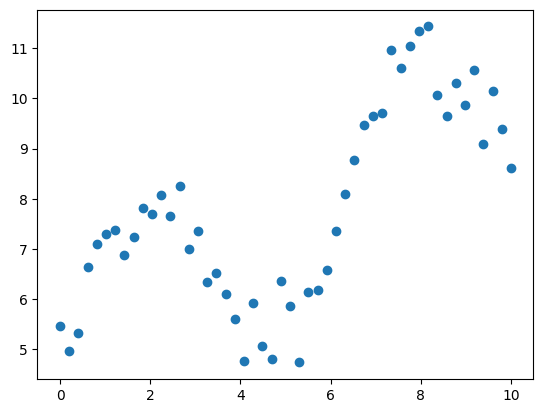

In [ ]:
plt.scatter(x,y)
plt.show()

Полином степени 6:
          6           5          4         3         2
0.001486 x - 0.04348 x + 0.4557 x - 2.004 x + 3.113 x + 0.1309 x + 5.26

Полином степени 11:
            11             10            9           8          7
-2.777e-06 x  + 0.0001516 x  - 0.003598 x + 0.04864 x - 0.4117 x
          6         5         4         3         2
 + 2.258 x - 8.042 x + 18.19 x - 24.83 x + 17.83 x - 3.254 x + 5.301

Полином степени 16:
            16             15            14            13           12
-1.829e-08 x  + 1.507e-06 x  - 5.64e-05 x  + 0.001267 x  - 0.01905 x 
           11         10         9         8         7       6
 + 0.2021 x  - 1.554 x  + 8.762 x - 36.16 x + 107.8 x - 226 x
          5         4         3         2
 + 317.3 x - 272.9 x + 117.8 x - 9.464 x - 3.885 x + 5.466

Полином степени 25:
           25             24             23             22           21
5.173e-15 x  - 3.615e-13 x  + 1.026e-11 x  - 1.392e-10 x  + 5.7e-10 x 
              20             

<ipython-input-69-90b964ff9932>:5: RankWarning: Polyfit may be poorly conditioned
  model = np.poly1d(np.polyfit(x, y, degree))


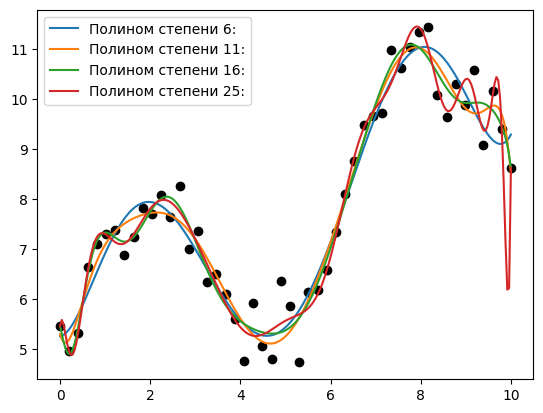

In [ ]:
degrees = [6, 11, 16, 25] # оптимальная, +5 и +10
polyline = np.linspace(np.min(x), np.max(x), 250)

for degree in degrees:
    model = np.poly1d(np.polyfit(x, y, degree))
    plt.plot(polyline, model(polyline), label='Полином степени {}:'.format(degree))
    print('Полином степени {}:'.format(degree))
    print(model)
    print()

plt.scatter(x, y, color='black')
plt.legend()
plt.show()

К выбранным моделям (полиномам соответствующих степеней) применить метод регуляризации с использованием гребневой регрессии (ридж-регрессии) и Лассо-регрессии. Вывести значения коэффициентов полинома. Повторить для различных значений параметра λ.

Рассчитать функционал эмпирического риска (функционал качества) для всех полученных моделей на обучающей и контрольной выборках (вывести графики).

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=777)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

alphas = np.logspace(-3, 2, 12, endpoint=True)
scores = []

for alpha in alphas:
  cur_scores = []
  for degree in degrees:
      poly = PolynomialFeatures(degree=degree)
      xp = poly.fit_transform(x.reshape(-1, 1))
      X_train, X_test, y_train, y_test = train_test_split(xp, y, test_size=0.20, random_state=777)
      ridge_regression = Ridge(alpha=alpha)
      ridge_regression.fit(X_train, y_train)
      print('Полином степени {}, alpha {}:'.format(degree, alpha))
      print(ridge_regression.coef_)
      score = ridge_regression.score(X_test, y_test)
      cur_scores.append(score)
      print('Точность предсказания: {}'.format(score))
      print()
  scores.append(cur_scores)


Полином степени 6, alpha 0.001:
[ 0.00000000e+00  4.33949244e-01  2.75500427e+00 -1.85282319e+00
  4.26546899e-01 -4.08559400e-02  1.39714247e-03]
Точность предсказания: 0.9649653745602966

Полином степени 11, alpha 0.001:
[ 0.00000000e+00  9.13618756e-01  4.41368078e+00 -7.19522910e+00
  5.84656404e+00 -2.86660267e+00  8.77530093e-01 -1.71416967e-01
  2.14459125e-02 -1.66797272e-03  7.35527500e-05 -1.40563659e-06]
Точность предсказания: 0.9744406924099777

Полином степени 16, alpha 0.001:
[ 0.00000000e+00 -2.50496825e+00  1.13936221e+01 -5.76779154e+00
 -6.26883587e+00  4.86687777e+00  3.46125637e+00 -5.93337940e+00
  3.55005691e+00 -1.24333360e+00  2.86966554e-01 -4.55734495e-02
  5.03120438e-03 -3.80495063e-04  1.88391925e-05 -5.50933262e-07
  7.22207639e-09]
Точность предсказания: 0.9251730106876916

Полином степени 25, alpha 0.001:
[-7.36575683e-10 -5.17611011e-10 -6.48641566e-10 -3.17917206e-10
 -9.34636137e-11  1.02022377e-09  1.35969809e-09 -2.53879428e-10
  1.10906635e-09  1.3

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.21855e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.20146e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.42179e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=9.74539e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarnin

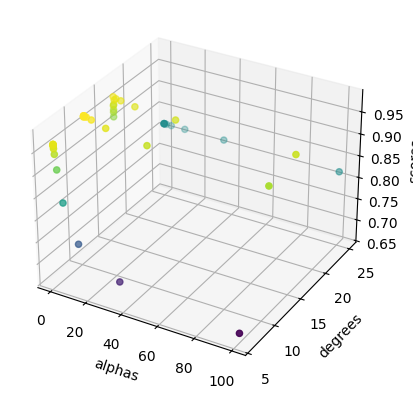

In [ ]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
ax = plt.axes(projection='3d')
Alphas, Degrees = np.meshgrid(alphas, degrees)
ax.set_xlabel('alphas')
ax.set_ylabel('degrees')
ax.set_zlabel('scores')
ax.scatter(Alphas, Degrees, np.transpose(scores), c=np.transpose(scores))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

alphas = np.logspace(-3, 2, 12, endpoint=True)
scores = []

for alpha in alphas:
  cur_scores = []
  for degree in degrees:
      poly = PolynomialFeatures(degree=degree)
      xp = poly.fit_transform(x.reshape(-1, 1))
      X_train, X_test, y_train, y_test = train_test_split(xp, y, test_size=0.20, random_state=777)
      lasso_regression = Lasso(alpha=alpha)
      lasso_regression.fit(X_train, y_train)
      print('Полином степени {}, alpha {}:'.format(degree, alpha))
      print(lasso_regression.coef_)
      score = lasso_regression.score(X_test, y_test)
      cur_scores.append(score)
      print('Точность предсказания: {}'.format(score))
      print()
  scores.append(cur_scores)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.781e+01, tolerance: 1.541e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.658e+01, tolerance: 1.541e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.430e+01, tolerance: 1.541e

Полином степени 6, alpha 0.001:
[ 0.00000000e+00  3.47690821e-01 -3.18757963e-01  4.49912319e-02
  1.85072766e-03 -9.00356569e-05 -2.41968518e-05]
Точность предсказания: 0.6356737003581112

Полином степени 11, alpha 0.001:
[ 0.00000000e+00  5.38623103e-01 -3.29842097e-01  3.71573627e-02
  1.89469604e-03 -8.35601033e-07 -9.08430436e-06 -1.05881570e-06
 -8.06074438e-08 -3.89576424e-09  5.41253839e-11  4.57178063e-11]
Точность предсказания: 0.6583693064755892

Полином степени 16, alpha 0.001:
[ 0.00000000e+00  7.20943397e-01 -4.04721491e-01  4.04178020e-02
  2.43009682e-03  4.01186259e-05 -7.31731314e-06 -1.12720910e-06
 -1.09514252e-07 -8.63331887e-09 -5.67479045e-10 -2.78877008e-11
 -2.98730813e-13  1.68814540e-13  3.17547882e-14  4.21737155e-15
  4.88569424e-16]
Точность предсказания: 0.7221701974346711

Полином степени 25, alpha 0.001:
[ 0.00000000e+00  8.21203179e-01 -4.15560424e-01  3.86192387e-02
  2.41952395e-03  5.11748012e-05 -5.72508586e-06 -9.73215684e-07
 -9.79365589e-08 -8.0

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.131e+01, tolerance: 1.541e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.054e+01, tolerance: 1.541e-02
  model = cd_fast.enet_coordinate_descent(


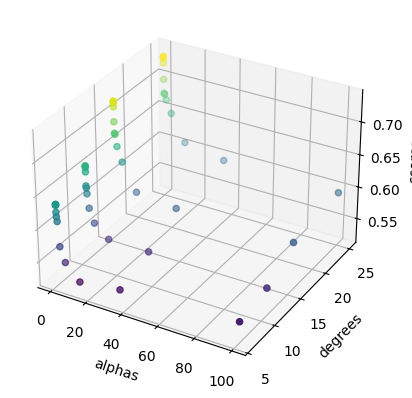

In [ ]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
ax = plt.axes(projection='3d')
Alphas, Degrees = np.meshgrid(alphas, degrees)
ax.set_xlabel('alphas')
ax.set_ylabel('degrees')
ax.set_zlabel('scores')
ax.scatter(Alphas, Degrees, np.transpose(scores), c=np.transpose(scores))

In [ ]:
def compare_models(degree, alpha):
    polyline = np.linspace(np.min(x), np.max(x), 250)

    # Обычная полиномиальная регрессия
    model = np.poly1d(np.polyfit(x, y, degree))
    plt.plot(polyline, model(polyline), label='Без регуляризации')

    # Ridge регрессия
    poly = PolynomialFeatures(degree=degree)
    xp = poly.fit_transform(x.reshape(-1, 1))
    ridge_regression = Ridge(alpha=alpha)
    ridge_regression.fit(xp, y)
    plt.plot(polyline, ridge_regression.predict(poly.fit_transform(polyline.reshape(-1, 1))), label='Ridge регрессия')

    # Lasso регрессия
    lasso_regression = Lasso(alpha=alpha)
    lasso_regression.fit(xp, y)
    plt.plot(polyline, lasso_regression.predict(poly.fit_transform(polyline.reshape(-1, 1))), label='Lasso регрессия')

    # Вывод графика
    plt.scatter(x, y, color='red')
    plt.title('Полином степени {}:'.format(degree))
    plt.legend()
    plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.291e+01, tolerance: 1.894e-02
  model = cd_fast.enet_coordinate_descent(


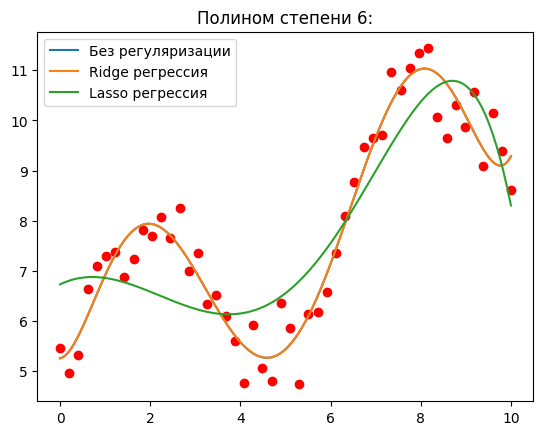

In [ ]:
degree = 6
alpha = 1e-3
compare_models(degree, alpha)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.99824e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e+01, tolerance: 1.894e-02
  model = cd_fast.enet_coordinate_descent(


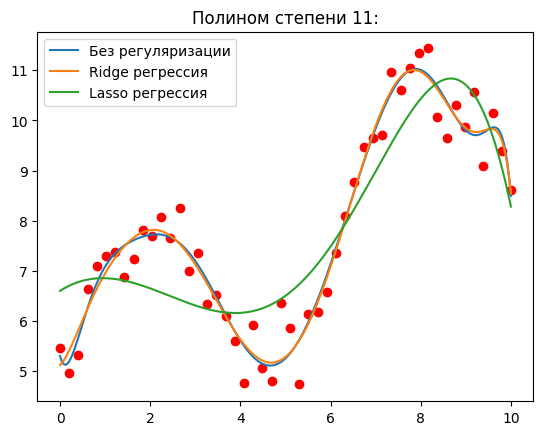

In [ ]:
degree = 11
alpha = 1e-3
compare_models(degree, alpha)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.750e+01, tolerance: 1.894e-02
  model = cd_fast.enet_coordinate_descent(


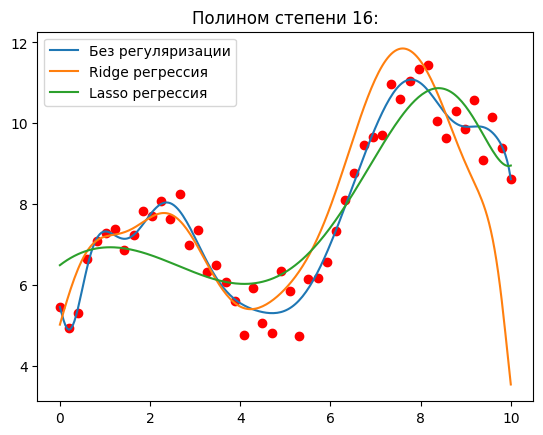

In [ ]:
degree = 16
alpha = 1e-3
compare_models(degree, alpha)

<ipython-input-75-e6e9a219246b>:5: RankWarning: Polyfit may be poorly conditioned
  model = np.poly1d(np.polyfit(x, y, degree))
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.698e+01, tolerance: 1.894e-02
  model = cd_fast.enet_coordinate_descent(


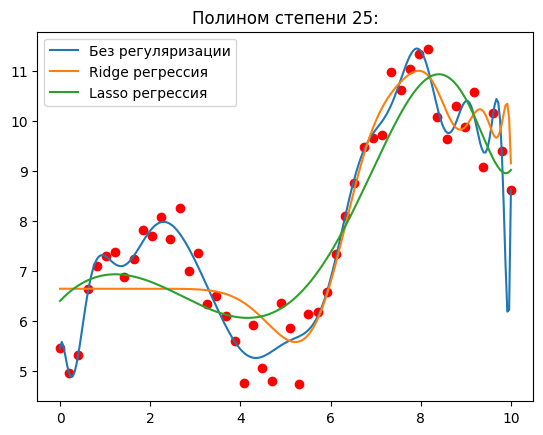

In [ ]:
degree = 25
alpha = 1e-3
compare_models(degree, alpha)